In [1]:
import pandas as pd
import numpy as np

path = '02. 화장품.csv'
df = pd.read_csv(path)


In [2]:
df.columns.unique()

Index(['Index', 'RawText', 'Source', 'Domain', 'MainCategory', 'ProductName',
       'ReviewScore', 'Syllable', 'Word', 'RDate', 'GeneralPolarity',
       'Aspects'],
      dtype='object')

In [3]:
df_1 = df.copy()
df_1 = df_1[['Index', 'RawText', 'ReviewScore']]
df_1

,Index,RawText,ReviewScore
0,215137,유통기한도 넉넉하고 구성도 많아서 선물 하기 좋네요. 만족합니다.,100
1,215140,구성도알차고촉촉하고너무좋아용,100
2,215143,대용량으로 넉넉하게 사용할 수 있고 무난하고 순한 편이네요 제품 구성은 좋으나 가격...,80
3,215146,참존을 이 구성에 이 가격으로 사도 되나 싶은 생각이 드는 제품 양도 많아요,80
4,215147,끈적임 없이 잘 흡수되어 매우 만족합니다,100
...,...,...,...
44991,690357,저희 아빠가 항상 다 쓰기 전에 미리 사 달라고 부탁하세요. 꾸준히 사용하시는 제품...,5
44992,690359,이것저것 바르기 귀찮아하는 남편 올인원 로션으로 제격입니다. 매번 구매하는 제품입니...,5
44993,690361,향기가 너무 좋습니다. 바르자 마자는 향이 조금 강하기는 합니다. 하지만 시간이 지...,5
44994,690423,간편하게 하나만 발라도 되어서 신랑이 좋아하네요. 향기도 끝내줍니다. 제가 너무 좋...,5


In [4]:
# ReviewScore 70점 이상인 항목을 1(긍정 리뷰)로 분류
df_1['label'] = [1 if x >= 70 else 0 for x in df_1['ReviewScore']]
df_1

,Index,RawText,ReviewScore,label
0,215137,유통기한도 넉넉하고 구성도 많아서 선물 하기 좋네요. 만족합니다.,100,1
1,215140,구성도알차고촉촉하고너무좋아용,100,1
2,215143,대용량으로 넉넉하게 사용할 수 있고 무난하고 순한 편이네요 제품 구성은 좋으나 가격...,80,1
3,215146,참존을 이 구성에 이 가격으로 사도 되나 싶은 생각이 드는 제품 양도 많아요,80,1
4,215147,끈적임 없이 잘 흡수되어 매우 만족합니다,100,1
...,...,...,...,...
44991,690357,저희 아빠가 항상 다 쓰기 전에 미리 사 달라고 부탁하세요. 꾸준히 사용하시는 제품...,5,0
44992,690359,이것저것 바르기 귀찮아하는 남편 올인원 로션으로 제격입니다. 매번 구매하는 제품입니...,5,0
44993,690361,향기가 너무 좋습니다. 바르자 마자는 향이 조금 강하기는 합니다. 하지만 시간이 지...,5,0
44994,690423,간편하게 하나만 발라도 되어서 신랑이 좋아하네요. 향기도 끝내줍니다. 제가 너무 좋...,5,0


In [5]:
# 중복 데이터 확인
df_1['RawText'].nunique(), df_1['ReviewScore'].nunique(), df_1['label'].nunique()

(44996, 16, 2)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Index        44996 non-null  int64 
 1   RawText      44996 non-null  object
 2   ReviewScore  44996 non-null  int64 
 3   label        44996 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = df_1.drop(['label'], axis=1)
y = df_1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

<Axes: xlabel='label'>

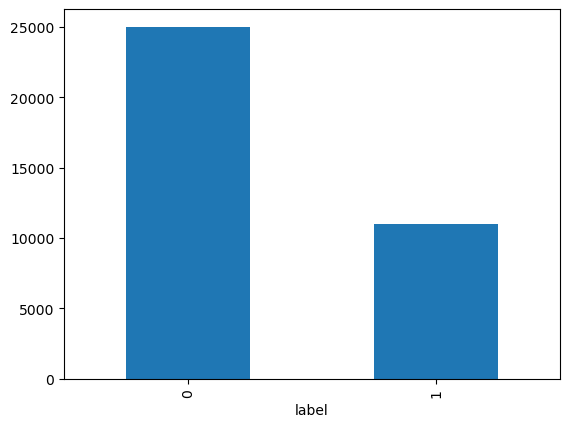

In [8]:
y_train.value_counts().plot(kind = 'bar')

In [9]:
y_train.value_counts() 

label
0    25012
1    10984
Name: count, dtype: int64

In [10]:
X_train.count()

Index          35996
RawText        35996
ReviewScore    35996
dtype: int64

### 테스트 데이터 전처리

In [11]:
X_test['RawText'] = X_test['RawText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
X_test['RawText'].replace('', np.nan, inplace=True)
print(X_test.isnull().sum()) #null값 확인

X_test['RawText'] = X_test['RawText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
X_test['RawText'].replace('', np.nan, inplace=True)
print(X_test.isnull().sum())

Index          0
RawText        0
ReviewScore    0
dtype: int64
Index          0
RawText        0
ReviewScore    0
dtype: int64


In [12]:
print(X_test)

        Index                                            RawText  ReviewScore
40931  660245  가격은 비싸지만 항상 사용하는 제품입니다. 발색이 좋고, 촉촉하고, 오랫동안 유지됩니다.            5
11661  244663  느낌은 안 느껴지는데 처음하고 다음 날 얼굴근육이 아파서 며칠 고생 중입니다. 워낙...          100
29826  667423  몇년째 꾸준히 사용하고 있는 제품인데, 이번에 저렴한 가격에 잘 구매했어요. 립스틱...            4
25886  769707            향이 너무 강해서 별로예요. 워낙 뜨는 머리라 완벽하게 눌리진 않네요.            5
6355   229232  전 찐득한 느낌을 너무 싫어하는데 끈적이는 그러점을 느낄 수 없어 너무 좋습니다 흡...          100
...       ...                                                ...          ...
5581   616829  분리형이라 부착하기 편할 것 같아 구매했어요. 하지만 두꺼워서 그런지 코 부분이 들...            5
30370  672459  데일리로 쓰기 좋은 컬러입니다. 계절에 상관 없이 사용하기 좋아요. 무난하게 사용할...            5
10464  238874  가격도 비싼데 사은품 하나 없네요. 사용해 보니, 지성 피부에는 답답한 느낌이에요....          100
911    316092  가성비 진짜 좋은 것 같습니다 아침에 쓰기에는 화장이 조금 밀리는 것 같네요.  제...            5
27395  779844  스트레스때문인지 새치가 생기기 시작했는데 요새 새치염색샴푸 핫하다길래 구매해봤어요....            5

[9000 rows x 3 columns]


### 벡터화

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# 텍스트 데이터 벡터화
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['RawText'])
X_test_vectorized = vectorizer.transform(X_test['RawText'])

### 나이브 베이즈

In [14]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [16]:
y_pred = model.predict(X_test_vectorized)

In [17]:
import pandas as pd

y_pred_series = pd.Series(y_pred)

value_counts = y_pred_series.value_counts()

print(value_counts)

0    7041
1    1959
Name: count, dtype: int64


In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8724444444444445


### 긍부정 리뷰 keyword

In [28]:
import numpy as np


log_prob = model.feature_log_prob_

feature_names = np.array(vectorizer.get_feature_names_out())

# 긍정
print("Top 10 Most Informative Features for Positive Class:")
positive_features = feature_names[np.argsort(log_prob[1])[::-1][:10]]
positive_features_log = np.argsort(log_prob[1])[::-1][:10]
print(positive_features)


# 부정
print("Top 10 Most Informative Features for Negative Class:")
negative_features = feature_names[np.argsort(log_prob[0])[::-1][:10]]
positive_features_log = np.argsort(log_prob[1])[::-1][:10]
print(negative_features)

Top 10 Most Informative Features for Positive Class:
['좋아요' '너무' '같아요' '좋고' '피부가' '좋네요' '많이' '촉촉하고' '바르고' '효과가']
Top 10 Most Informative Features for Negative Class:
['좋습니다' '너무' '좋아요' '향이' '같습니다' '좋고' '좋은' '같아요' '향도' '다른']


In [21]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 220.2 kB/s eta 0:00:07
     - -------------------------------------- 0.1/1.5 MB 297.7 kB/s eta 0:00:05
     ------------ --------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
     -------------------------------- ------- 1.2/1.5 MB 4.1 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 4.6 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.6 kB ? eta -:--:--
   ------------------

In [23]:
import nltk

In [24]:
positive_reviews = df_1.loc[df_1['ReviewScore'] >= 70, 'RawText']
negative_reviews = df_1.loc[df_1['ReviewScore'] < 70, 'RawText']

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
positive_lengths = [len(nltk.word_tokenize(review)) for review in positive_reviews]
negative_lengths = [len(nltk.word_tokenize(review)) for review in negative_reviews]


# 평균 길이
average_positive_length = sum(positive_lengths) / len(positive_lengths)
average_negative_length = sum(negative_lengths) / len(negative_lengths)

print("Average Length of Positive Reviews:", average_positive_length)
print("Average Length of Negative Reviews:", average_negative_length)

Average Length of Positive Reviews: 20.651269367862078
Average Length of Negative Reviews: 25.755192166149318


### Test

In [29]:
new_words = '가성비 진짜 좋은 것 같습니다'
new_words_vectorized = vectorizer.transform([new_words])
y_pred_2 = model.predict(new_words_vectorized)

y_pred_2

array([0], dtype=int64)

In [38]:
new_words = '가성비 진짜 좋은 것 같습니다'

X_train_new = list(X_test['RawText']).append(new_words)

new_words_vectorized = vectorizer.transform([new_words])

model.fit(X_train_new, y_train)

# 새로운 문장 예측
y_pred_2 = model.predict(new_words_vectorized)

print(y_pred_2)

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.